In [39]:
from sklearn import decomposition
import pandas as pd

#read and parse the training set .csv features file 
df = pd.read_csv('Datasets/A3-data.txt', delimiter = ',', usecols=['x', 'y', 'z', 't'])
y = pd.read_csv('Datasets/A3-data.txt', delimiter = ',', usecols=['class'])




pca = decomposition.PCA(n_components=4)
principal_components = pca.fit_transform(df)
#print(principal_components)

principal_df = pd.DataFrame(principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(principal_df.shape)
principal_df.head()
# principal_df = pd.DataFrame(principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

print("component vectors")
print(pca.components_)

print("Explained variance")
print(pca.explained_variance_)


print("Explained variance ratio")
print(pca.explained_variance_ratio_)
#principal_df.head()

(360, 4)
component vectors
[[ 0.00692777  0.97004112  0.20878203 -0.12402536]
 [-0.00914805  0.22965464 -0.9548303   0.18834584]
 [ 0.00216027 -0.07911495 -0.21122162 -0.97422871]
 [ 0.99993182 -0.00444872 -0.0097256   0.00468714]]
Explained variance
[24.53191904 16.3023199  10.61579661  0.13994948]
Explained variance ratio
[0.47551708 0.31599776 0.20577243 0.00271273]


In [29]:
print(principal_df['PC1'][0])

df_mean = df - df.mean(axis=0)
print(df_mean.iloc[0].dot(pca.components_[0]))

-11.140744391768722
-11.140744391768731


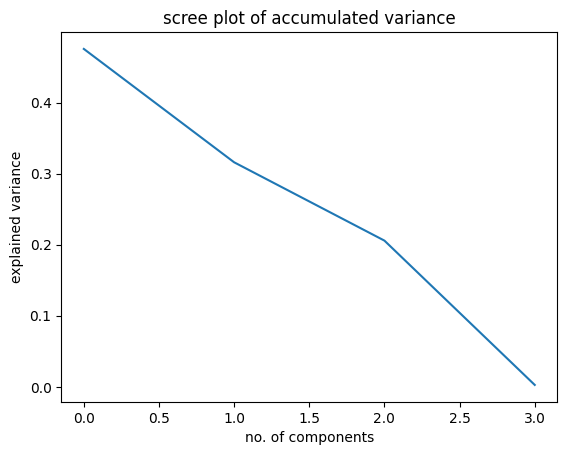

In [56]:
#scree plot of the variance
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("no. of components")
plt.ylabel("explained variance")
plt.title("scree plot of accumulated variance")
plt.show()

In [41]:
#create a dataframe with first 2 principal components with their labeld targets
df_labeled = pd.concat([principal_df, y], axis=1)

df_labeled.head()



,PC1,PC2,PC3,PC4,class
0,-11.140744,1.777584,2.506627,0.025473,1
1,5.264961,1.785206,0.380381,-0.049323,5
2,-0.397063,-2.667042,0.944489,0.128564,2
3,-3.444823,4.255369,4.008384,-0.019010,1
4,-0.098412,-3.439195,2.748949,-0.130419,4


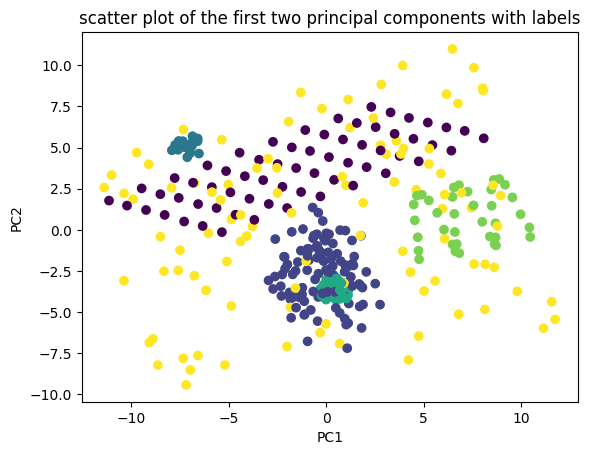

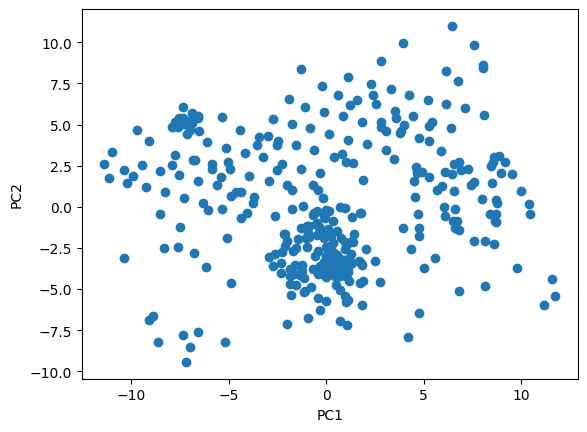

In [58]:
#scatter plot of the first two principal components with labels
plt.scatter(df_labeled['PC1'], df_labeled['PC2'], c = df_labeled['class'])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("scatter plot of the first two principal components with labels")
plt.show()

#scatter plot of the first two principal components
plt.scatter(x = principal_df['PC1'], y = principal_df['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

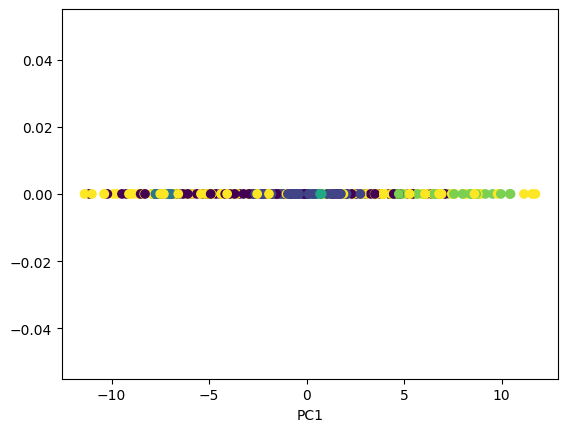

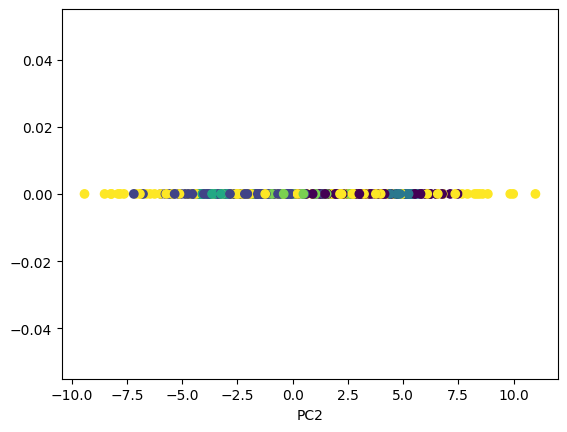

In [48]:
# plot only scatter plot of PC1
import numpy as np
plt.scatter(df_labeled['PC1'], np.zeros(len(df_labeled)), c = df_labeled['class'])
plt.xlabel("PC1")
plt.show()

# plot only scatter plot of PC2
import numpy as np
plt.scatter(df_labeled['PC2'], np.zeros(len(df_labeled)), c = df_labeled['class'])
plt.xlabel("PC2")
plt.show()